### Suppose that you are the ***head of branch expansion*** of food chain "McDollibee" with the base of operations located here at AIM. You are tasked to create a strategy that considers the following:
1. Level of Urbanization - You want to expand to a location where the amenity density is in top 10 percentile. 
2. Market Availability and Competition - You cater to students but you prefer areas with limited competition
3. Logistics - The farther the location is from AIM, the more expensive building the branch will be.

Using the information available to you, create a report on what possible locations fit the requirements of your branch expansion strategy.

In [1]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from shapely.wkt import loads
from shapely.geometry import Point, LineString, Polygon
import psycopg2
import geopandas as gpd

import warnings
warnings.filterwarnings("ignore")

In [3]:
conn = psycopg2.connect(dbname="postgis", 
                 user="gsa2022", 
                 password="g5!V%T1Vmd", 
                 host="192.168.212.99", 
                 port=32771)

<div style='display: flex; justify-content: space-between; align-items: center; background-color: white; color: Black; padding: 10px; width: 100%;'>
    <h2><br><b>Project Proposal: McDollibee Expansion Plan</b></h2>
    <img src='Mcdollibee.jpg' style='height: 70px; width: auto; margin-left: auto;'>
</div>    

#### <br><br>Good day,<br><br> As the Head of Branch Expansion at McDollibee, I am proposing a strategic plan for our next phase of growth. Our goal is to identify and establish new branches in high-potential areas, focusing on urban locations with a dense population of our target demographic, students. The plan prioritizes market demand, competitive positioning, and logistical efficiency to ensure profitable and sustainable expansion.<br><br>Thank you for considering this opportunity to grow McDollibee’s presence and success.

#### Since our establishment in 2023, McDollibee has successfully launched three branches in close proximity to our Makati headquarters, capitalizing on strategic locations near educational institutions. These branches have consistently shown profitability, affirming our business model and approach. With a clear understanding of our target market and a validated blueprint for success, the time is ripe to expand our footprint. Our ambition is to replicate this model across multiple cities, opening three branches per city within the next two years, ensuring each location aligns with our supply chain capabilities to sustain our growth trajectory. Let's seize this moment to solidify McDollibee's position in the market.<br><br>

_____
# I. Level of Urbanization
#### Our primary focus for new branch locations is on urban areas with high amenity density. Given our current market position and capital size, we aim to minimize risk by steering clear of rural expansion in favor of well-established urban centers. This strategy ensures robust foot traffic and avoids the uncertainties of future urban development in less populated areas. Our commitment is to smart, data-driven growth that reinforces our market presence.<br>
#### Our team approached this objective by selecting the **top 10 percentive in terms of the amenity density.**

*Codes are hidden for better flow of reporting*

In [63]:
aim = Point(121.01821226049776, 14.55462939054131)

In [8]:
df_gadm = gpd.read_postgis('''
SELECT *
FROM 
    gadm.ph g
''', con = conn)

In [4]:
df_municipality = gpd.read_postgis('''
SELECT g.name_1, g.name_2,
       SUM(ST_Area(ST_Transform(g.geom, 3123)) / 1000000) AS area_sq_km, 
       COUNT(p.amenity) AS amenity_count,
       (COUNT(p.amenity) / SUM(ST_Area(ST_Transform(g.geom, 3123)) / 1000000)) AS amenity_density,
       g.geom
FROM 
    gadm.ph g
LEFT JOIN 
    ph_point p 
ON ST_Contains(g.geom, p.way)
GROUP BY g.name_1, g.name_2, g.geom
ORDER BY amenity_density DESC
''', con = conn)

In [14]:
percentile_90 = df_municipality['amenity_density'].quantile(0.9)

# Filter the DataFrame for rows where the amenity density is at or above the 90th percentile
top_10_percentile_df = df_municipality[df_municipality['amenity_density'] >= percentile_90]
top_10_percentile_df.head(10)

,name_1,name_2,area_sq_km,amenity_count,amenity_density,geom
0,Metropolitan Manila,Pateros,318.662491,75,0.235359,"MULTIPOLYGON (((121.06864 14.53992, 121.06883 ..."
1,Laguna,Sampaloc Lake,15.791182,3,0.189979,"MULTIPOLYGON (((121.32890 14.07238, 121.32828 ..."
2,Ilocos Norte,Paoay Lake,21.812845,3,0.137534,"MULTIPOLYGON (((120.52215 18.11385, 120.52238 ..."
3,Cavite,Noveleta,245.693825,21,0.085472,"MULTIPOLYGON (((120.87308 14.41642, 120.87128 ..."
4,Cavite,Cavite City,840.823746,65,0.077305,"MULTIPOLYGON (((120.87695 14.45306, 120.87722 ..."
5,Metropolitan Manila,San Juan,5485.420103,406,0.074014,"MULTIPOLYGON (((121.02965 14.59402, 121.02961 ..."
6,Metropolitan Manila,Navotas,770.532858,57,0.073975,"MULTIPOLYGON (((120.96163 14.63365, 120.96139 ..."
7,Pangasinan,Santo Tomas,29.006782,2,0.068949,"MULTIPOLYGON (((120.58046 15.85991, 120.57989 ..."
8,Cavite,Rosario,449.979827,31,0.068892,"MULTIPOLYGON (((120.85187 14.40185, 120.85072 ..."
9,Negros Occidental,Pulupandan,468.511944,26,0.055495,"MULTIPOLYGON (((122.82030 10.48025, 122.82011 ..."


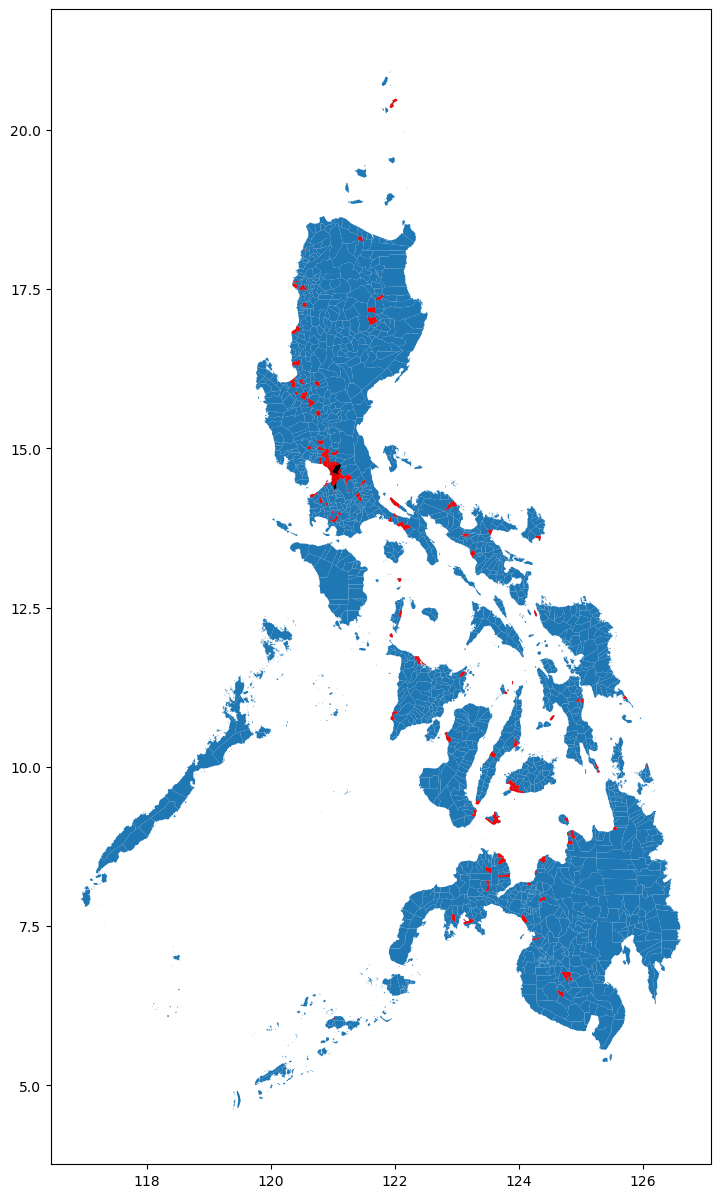

In [57]:
    ax = df_gadm.plot(figsize=(15, 15), zorder=1, label='Other Municipalities')
df_gadm[df_gadm['name_1'] == 'Metropolitan Manila'].plot(ax=ax, facecolor='black', zorder=2, label='Metropolitan Manila')
top_10_percentile_df.plot(ax=ax, facecolor='red', zorder=3, label='Top 10 Percentile Amenity Density')

# Display the plot
plt.show()

#### The graph illustrates a varied distribution of municipalities within the top 10 percentile for amenity density nationwide. Notably, Metropolitan Manila stands out, with the majority of its areas falling within this top tier—a testament to the National Capital Region's density and urbanity. This visualization underscores the expansive market potential that spans beyond familiar territories, marking out regions where aggressive yet judicious expansion can take root. <br><br>While our company's long-term vision includes being a catalyst in the urbanization of rural locales, the immediate strategy is a concentrated analysis of NCR cities. This precise focus is designed to streamline our logistics and supply chain efficiency as we venture into these new markets. The move reflects our commitment to sustainable growth as we carefully navigate our expansion trajectory.
<br>

In [64]:
df_gadm['my_point'] = aim

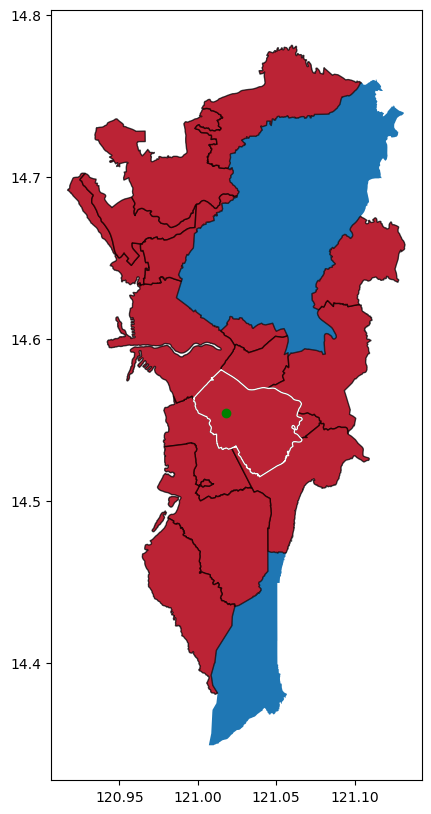

In [68]:
ax = df_gadm[df_gadm['name_1'] == 'Metropolitan Manila'].plot(figsize=(10, 10), zorder=2, label='Metropolitan Manila')
top_10_percentile_df[top_10_percentile_df['name_1']=='Metropolitan Manila'].plot(ax=ax, facecolor='red', edgecolor='black',alpha=0.7, zorder=3, label='Top 10 Percentile Amenity Density')
df_gadm[df_gadm['name_2'] == 'Makati City'].plot(ax=ax, facecolor='none', edgecolor='white', zorder=3, label='Makati')
plt.scatter(aim.x, aim.y, color='green', zorder=5)
plt.show()

# II. Market Analysis

#### The `red` area consists of the most dense in terms of amenity in `Metropolitan Manila` while `Makati City` stands out as our headquarters is at the heart of the city.

#### Given that we already have 3 establishments inside Makati City, we have a partial foothold of the market share here but I would recommend that we **include more branches around the area** because of the following considerations about our target market:
1. **Education** - childcare, school, tutor, kindergarten, dormitory, library, university
2. **Recreation** - music school, internet cafe, theatre, dancing school, basketball, swimming, worship
3. **Residency** - village, parks, residence

In [100]:
student_area_makati = gpd.read_postgis(
'''
SELECT p.*
FROM ph_point as p
JOIN gadm.ph as g
ON ST_WITHIN(p.way, g.geom)
WHERE p.amenity != 'None'
AND g.name_2 LIKE '%Makati%'
AND (LOWER(p.amenity) IN ('childcare', 'school', 'tutoring', 'music_school', 'kindergarten',
                              'preschool', 'dormitory', 'internet_cafe', 'theatre', 'library', 
                              'dancing_school')
        OR LOWER(p.amenity) LIKE '%college%'
        OR LOWER(p.amenity) LIKE '%worship%'
        OR LOWER(p.amenity) LIKE '%basketball%'
        OR LOWER(p.amenity) LIKE '%swimming%'
        OR LOWER(p.amenity) LIKE '%university%'
        OR LOWER(p.amenity) LIKE '%residential%'
        OR LOWER(p.amenity) LIKE '%residence%'
        OR LOWER(p.amenity) LIKE '%village%'
        OR LOWER(p.amenity) LIKE '%park'
        OR LOWER(p.amenity) LIKE '%arts_centre%'
        )
''', conn, geom_col='way')

makati_barangay = gpd.read_postgis('''
SELECT *
FROM gadm.ph_brgy
WHERE name_2 LIKE '%Makati%'
''',conn)

makati_barangay['my_point'] = aim

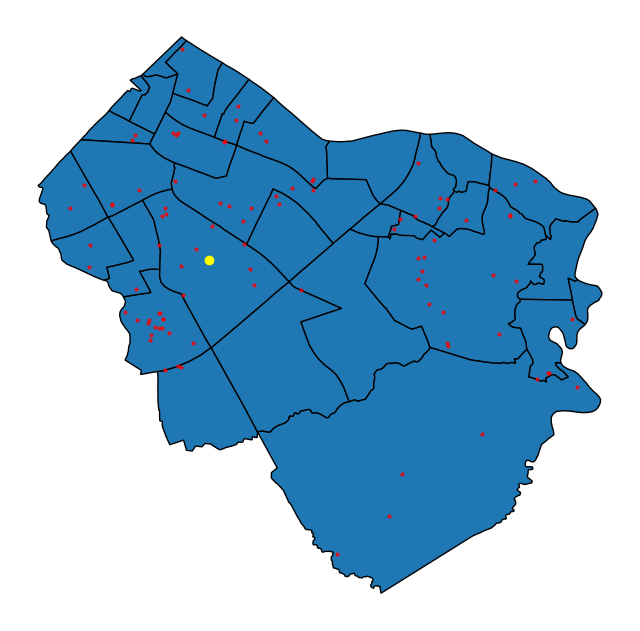

In [101]:
ax = student_area_makati.plot(figsize = (8,8), facecolor='red',alpha=0.7, markersize = 4, zorder=2)
makati_barangay.plot(ax=ax, edgecolor = 'black',zorder=1)
plt.scatter(aim.x, aim.y, color='yellow', zorder=5)
ax.set_axis_off()

#### Now our strategy will be pushing our branches in all directions in an attempt to **maximize both opportunities and learnings** as we can iterate with the same conditions, especially, `proximity`.
#### So far, we already have in `San Lorenzo` where our headquarters is located. To avoid cannibalization, the team has decided that our placements will be at least `1KM` away from each branch.

In [139]:
dist_fr_makati = gpd.read_postgis(
'''
SELECT name_2, 
        name_3, 
        geom, 
        bearing,
        CASE 
        WHEN bearing >= -22.5 AND bearing < 22.5 THEN 'North'
        WHEN bearing >= 22.5 AND bearing < 67.5 THEN 'Northeast'
        WHEN bearing >= 67.5 AND bearing < 112.5 THEN 'East'
        WHEN bearing >= 112.5 AND bearing < 157.5 THEN 'Southeast'
        WHEN bearing >= 157.5 OR bearing < -157.5 THEN 'South'
        WHEN bearing >= -157.5 AND bearing < -112.5 THEN 'Southwest'
        WHEN bearing >= -112.5 AND bearing < -67.5 THEN 'West'
        WHEN bearing >= -67.5 AND bearing < -22.5 THEN 'Northwest'
        ELSE 'Unknown'
        END AS direction,
        avg_distance_fr_aim_km,
        area_in_km,
        student_amenity_count
        
        
FROM
(SELECT
    g.name_2, 
    g.name_3, 
    g.geom,
    DEGREES(ATAN2(
        ST_X(ST_Centroid(ST_Transform(g.geom, 3123))) - ST_X(ST_Transform(ST_SetSRID(ST_Point(121.01821226049776, 14.55462939054131), 4326), 3123)),
        ST_Y(ST_Centroid(ST_Transform(g.geom, 3123))) - ST_Y(ST_Transform(ST_SetSRID(ST_Point(121.01821226049776, 14.55462939054131), 4326), 3123))
    )) AS bearing,
    AVG(ST_Distance(
        ST_Transform(ST_SetSRID(ST_Point(121.01821226049776, 14.55462939054131), 4326), 3123),
        ST_Transform(p.way, 3123)
    ) / 1000) AS avg_distance_fr_aim_km,
    SUM(ST_Area(ST_Transform(g.geom, 3123)) / 1000000) AS area_in_km,
    COUNT(p.amenity) AS student_amenity_count
FROM 
    gadm.ph_brgy AS g
JOIN 
    ph_point AS p 
ON 
    ST_WITHIN(p.way, g.geom)
WHERE 
    g.name_2 LIKE '%Makati%' 
    AND p.amenity != 'None'
    AND (LOWER(p.amenity) IN ('childcare', 'school', 'tutoring', 'music_school', 'kindergarten',
                              'preschool', 'dormitory', 'internet_cafe', 'theatre', 'library', 
                              'dancing_school')
         OR LOWER(p.amenity) LIKE '%college%'
         OR LOWER(p.amenity) LIKE '%worship%'
         OR LOWER(p.amenity) LIKE '%basketball%'
         OR LOWER(p.amenity) LIKE '%swimming%'
         OR LOWER(p.amenity) LIKE '%university%'
         OR LOWER(p.amenity) LIKE '%residential%'
         OR LOWER(p.amenity) LIKE '%residence%'
         OR LOWER(p.amenity) LIKE '%village%'
         OR LOWER(p.amenity) LIKE '%park%'
         OR LOWER(p.amenity) LIKE '%arts_centre%')
GROUP BY 
    g.name_2, g.name_3, g.geom
ORDER BY avg_distance_fr_aim_km ASC) a
''', conn)

In [140]:
dist_fr_makati

,name_2,name_3,geom,bearing,direction,avg_distance_fr_aim_km,area_in_km,student_amenity_count
0,Makati City,San Lorenzo,"MULTIPOLYGON (((121.02287 14.55645, 121.02338 ...",170.423635,South,0.583583,60.822552,32
1,Makati City,Pio Del Pilar,"MULTIPOLYGON (((121.00660 14.55084, 121.00646 ...",-82.677115,West,0.900877,2.252761,4
2,Makati City,Bel-Air,"MULTIPOLYGON (((121.03558 14.55826, 121.03478 ...",44.120634,Northeast,0.995741,25.342069,15
3,Makati City,Urdaneta,"MULTIPOLYGON (((121.02287 14.55645, 121.02308 ...",73.468567,East,1.040226,2.934166,4
4,Makati City,Dasmariñas,"MULTIPOLYGON (((121.02420 14.53414, 121.02270 ...",144.879112,Southeast,1.061975,16.009861,8
5,Makati City,Bangkal,"MULTIPOLYGON (((121.01852 14.54415, 121.01809 ...",-144.796401,Southwest,1.124153,16.871355,17
6,Makati City,San Antonio,"MULTIPOLYGON (((121.01371 14.56299, 121.01330 ...",-44.680553,Northwest,1.414475,2.675088,3
7,Makati City,San Isidro,"MULTIPOLYGON (((121.00533 14.55221, 121.00523 ...",-85.066287,West,1.550539,1.424421,3
8,Makati City,Forbes Park,"MULTIPOLYGON (((121.03905 14.55736, 121.03905 ...",111.436365,East,1.658173,5.910118,3
9,Makati City,Santa Cruz,"MULTIPOLYGON (((121.01891 14.56918, 121.02037 ...",-8.313849,North,1.676824,2.111593,4


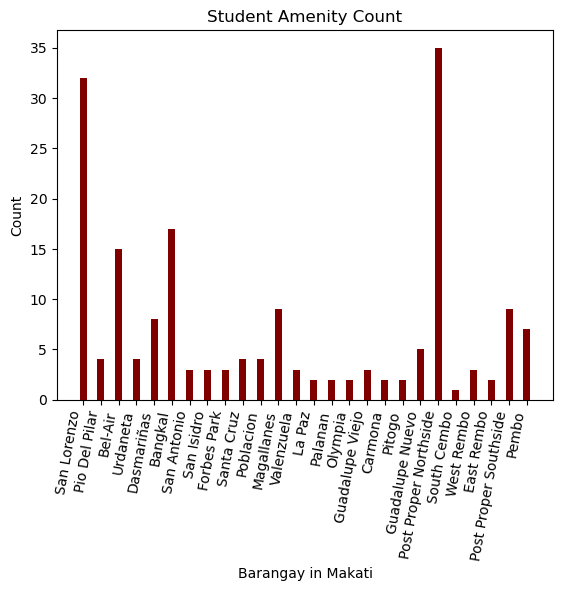

In [161]:
plt.bar(dist_fr_makati['name_3'], dist_fr_makati['student_amenity_count'], color ='maroon', width = 0.4)
 
plt.xlabel("Barangay in Makati")
plt.ylabel("Count")
plt.title("Student Amenity Count")
plt.xticks(rotation=80, ha='right')
plt.show()

#### At first glance, it seems obvious which area in Makati we will look into in terms of student_amenity_count: `Bel-Air`, `Bangkal`, `Post Proper Northside`. 
#### However, we also have to consider the potential competitors given the area of each barangay.

# III. Competitor Analysis

In [135]:
restau_makati = gpd.read_postgis(
'''
SELECT
    g.name_2, 
    g.name_3, 
    g.geom,
    COUNT(p.amenity) AS restaurant_count
FROM 
    gadm.ph_brgy AS g
JOIN 
    ph_point AS p 
ON 
    ST_WITHIN(p.way, g.geom)
WHERE 
    g.name_2 LIKE '%Makati%' 
    AND p.amenity != 'None'
    AND (LOWER(p.amenity) LIKE '%restaurant%'
        OR (LOWER(p.amenity) LIKE '%fast%' AND LOWER(p.amenity) LIKE '%food%')
        OR LOWER(p.amenity) = 'cafe'
        OR LOWER(p.amenity) LIKE 'cafe%'
        )
GROUP BY 
    g.name_2, g.name_3, g.geom
ORDER BY restaurant_count ASC
''', conn)

In [141]:
makati_df = pd.merge(dist_fr_makati, restau_makati, on = ['name_2','name_3', 'geom'])
makati_df

,name_2,name_3,geom,bearing,direction,avg_distance_fr_aim_km,area_in_km,student_amenity_count,restaurant_count
0,Makati City,San Lorenzo,"MULTIPOLYGON (((121.02287 14.55645, 121.02338 ...",170.423635,South,0.583583,60.822552,32,248
1,Makati City,Pio Del Pilar,"MULTIPOLYGON (((121.00660 14.55084, 121.00646 ...",-82.677115,West,0.900877,2.252761,4,11
2,Makati City,Bel-Air,"MULTIPOLYGON (((121.03558 14.55826, 121.03478 ...",44.120634,Northeast,0.995741,25.342069,15,181
3,Makati City,Urdaneta,"MULTIPOLYGON (((121.02287 14.55645, 121.02308 ...",73.468567,East,1.040226,2.934166,4,61
4,Makati City,Dasmariñas,"MULTIPOLYGON (((121.02420 14.53414, 121.02270 ...",144.879112,Southeast,1.061975,16.009861,8,23
5,Makati City,Bangkal,"MULTIPOLYGON (((121.01852 14.54415, 121.01809 ...",-144.796401,Southwest,1.124153,16.871355,17,15
6,Makati City,San Antonio,"MULTIPOLYGON (((121.01371 14.56299, 121.01330 ...",-44.680553,Northwest,1.414475,2.675088,3,27
7,Makati City,San Isidro,"MULTIPOLYGON (((121.00533 14.55221, 121.00523 ...",-85.066287,West,1.550539,1.424421,3,17
8,Makati City,Forbes Park,"MULTIPOLYGON (((121.03905 14.55736, 121.03905 ...",111.436365,East,1.658173,5.910118,3,14
9,Makati City,Santa Cruz,"MULTIPOLYGON (((121.01891 14.56918, 121.02037 ...",-8.313849,North,1.676824,2.111593,4,21


In [155]:
barangay_df = pd.read_csv('population_barangay_2020.csv', usecols=['Region','Mun_City','Barangay','2020 Census Popn'])
barangay_df['Mun_City'].replace('City of Makati', 'Makati City', inplace=True)

,Region,Mun_City,Barangay,2020 Census Popn
38019,National Capital Region (NCR),Makati City,Bangkal,17576.0
38020,National Capital Region (NCR),Makati City,Bel-Air,36007.0
38021,National Capital Region (NCR),Makati City,Cembo,25049.0
38022,National Capital Region (NCR),Makati City,Comembo,15805.0
38023,National Capital Region (NCR),Makati City,Carmona,2745.0
38024,National Capital Region (NCR),Makati City,Dasmariñas,4160.0
38025,National Capital Region (NCR),Makati City,East Rembo,26448.0
38026,National Capital Region (NCR),Makati City,Forbes Park,3715.0
38027,National Capital Region (NCR),Makati City,Guadalupe Nuevo,20533.0
38028,National Capital Region (NCR),Makati City,Guadalupe Viejo,12900.0


In [166]:
full_df = pd.merge(makati_df, barangay_df, left_on=['name_2','name_3'], right_on = ['Mun_City','Barangay'])
full_df = full_df.drop(['Region','Mun_City','Barangay'], axis =1)
full_df['population_density']=full_df['2020 Census Popn']/full_df['area_in_km']

In [175]:
full_df

,name_2,name_3,geom,bearing,direction,avg_distance_fr_aim_km,area_in_km,student_amenity_count,restaurant_count,2020 Census Popn,population_density
0,Makati City,San Lorenzo,"MULTIPOLYGON (((121.02287 14.55645, 121.02338 ...",170.423635,South,0.583583,60.822552,32,248,14054.0,231.065610
1,Makati City,Pio Del Pilar,"MULTIPOLYGON (((121.00660 14.55084, 121.00646 ...",-82.677115,West,0.900877,2.252761,4,11,50722.0,22515.486886
2,Makati City,Bel-Air,"MULTIPOLYGON (((121.03558 14.55826, 121.03478 ...",44.120634,Northeast,0.995741,25.342069,15,181,36007.0,1420.839007
3,Makati City,Urdaneta,"MULTIPOLYGON (((121.02287 14.55645, 121.02308 ...",73.468567,East,1.040226,2.934166,4,61,4563.0,1555.126825
4,Makati City,Dasmariñas,"MULTIPOLYGON (((121.02420 14.53414, 121.02270 ...",144.879112,Southeast,1.061975,16.009861,8,23,4160.0,259.839865
5,Makati City,Bangkal,"MULTIPOLYGON (((121.01852 14.54415, 121.01809 ...",-144.796401,Southwest,1.124153,16.871355,17,15,17576.0,1041.765789
6,Makati City,San Antonio,"MULTIPOLYGON (((121.01371 14.56299, 121.01330 ...",-44.680553,Northwest,1.414475,2.675088,3,27,17494.0,6539.598308
7,Makati City,San Isidro,"MULTIPOLYGON (((121.00533 14.55221, 121.00523 ...",-85.066287,West,1.550539,1.424421,3,17,6098.0,4281.038567
8,Makati City,Forbes Park,"MULTIPOLYGON (((121.03905 14.55736, 121.03905 ...",111.436365,East,1.658173,5.910118,3,14,3715.0,628.583026
9,Makati City,Santa Cruz,"MULTIPOLYGON (((121.01891 14.56918, 121.02037 ...",-8.313849,North,1.676824,2.111593,4,21,6333.0,2999.157654


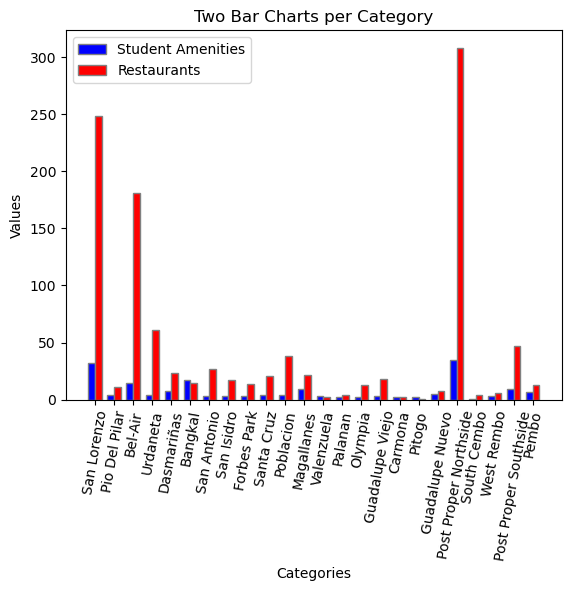

In [181]:
# Set the position of the bars on the x-axis
bar_width = 0.35
r1 = range(len(full_df))
r2 = [x + bar_width for x in r1]

# Plotting the first bar chart
plt.bar(r1, full_df['student_amenity_count'], color='b', width=bar_width, edgecolor='grey', label='Student Amenities')

# Plotting the second bar chart
plt.bar(r2, full_df['restaurant_count'], color='r', width=bar_width, edgecolor='grey', label='Restaurants')

# Adding labels
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Two Bar Charts per Category')
plt.xticks([r + bar_width / 2 for r in range(len(full_df['name_3']))], full_df['name_3'],rotation=80)

# Adding legend
plt.legend()

# Show plot
plt.show()

#### Looking at the ratio between student amenities and restaurant, we would want to look into `Bangkal` since it's only `1.2KM` away from our headquarters. It has a relatively large population of `17,000`. However, we must consider its population density given that it is relatively lower than other barangays. We need to look at the population density as these are our consistent consumers since they live in the vicinity.

#### Another potential locations in the `East` are both `Post Proper Southside` and `Pembo` as their ratios of student amenities to restaurants are relatively on the higher end. Their distance from our headquarters are around `4KM` which is satisfactory from a logistical and profitability perspective. Between the two, **I would go for `Pembo` if we're looking at our logistical, market availability, and urbanization criteria.**

#### As for the `South` location, we would recommend both `Magallanes` and `Dasmarinas` as we all know that they're a thriving community with its spacious areas and lavish living. It is suitable for schools and residents which will drive consistent customers. One consideration though is the foot traffic since they have the lowest population density in Makati mainly because of the sizes of homes and private properties. Nevertheless, as long as our marketing is spot-on, our products are fresh which is achievable given the distance, and our facilities are appealing to that market, then this is an opportunity to hold a very lucrative market.

# IV. Expansion to other cities

#### Given that the company is just starting out, once we get a foothold of Makati, we will expand into our neighbouring cities. We want to have as much control as we can while starting out. We need to be aggressive but our risks must be calculated and controllable. Therefore, our neighbouring cities are market potential except for `Pateros` given how small the market is.

In [232]:
makati_neighbors = gpd.read_postgis(
'''

SELECT g.name_2, g.geom, g.area, 
        COUNT(p.amenity) AS amenity_count,
       (COUNT(p.amenity) / SUM(ST_Area(ST_Transform(g.geom, 3123)) / 1000000)) AS amenity_density
FROM       
    (SELECT g2.name_2, g2.geom, ST_Area(ST_Transform(g2.geom, 3123))/100000 AS area
    FROM gadm.ph AS g1
    JOIN gadm.ph AS g2
    ON ST_TOUCHES(g1.geom,g2.geom)
    WHERE g1.name_2 = 'Makati City'
    GROUP BY g2.name_2, g2.geom) g
LEFT JOIN
    ph_point p
ON ST_Contains(g.geom, p.way)
GROUP BY g.name_2, g.geom, g.area
ORDER BY amenity_density DESC
''', conn)

In [233]:
# Let's read our financial and population data from our last meeting 
pop_df = pd.read_csv('financial_pop.csv', 
                     usecols=['net_oper_income','cash_balance_end','shp_municipality', 'pop'])


# Lets merge the population column to our data 
pop_df.columns = ['population','net_income','cash_balance', 'city']
merged_df = pd.merge(makati_neighbors, pop_df, left_on= ['name_2'], right_on=['city'])
merged_df['pop_dens'] = merged_df['population']/merged_df['area']
merged_df.drop('city',axis=1,inplace=True)

In [234]:
merged_df

,name_2,geom,area,amenity_count,amenity_density,population,net_income,cash_balance,pop_dens
0,Pateros,"MULTIPOLYGON (((121.06864 14.53992, 121.06883 ...",19.549846,75,0.235359,63840.0,38.299068,62.811989,3265.498856
1,Mandaluyong,"MULTIPOLYGON (((121.05405 14.57747, 121.05408 ...",109.410775,492,0.044611,386276.0,2902.031566,3491.561763,3530.511510
2,Pasay City,"MULTIPOLYGON (((121.00084 14.50921, 121.00070 ...",186.690018,711,0.022970,416522.0,950.974857,2603.383889,2231.088758
3,Pasig City,"MULTIPOLYGON (((121.08282 14.54377, 121.08270 ...",315.475506,1078,0.014430,755300.0,5351.386259,3636.653966,2394.163686
4,Taguig,"MULTIPOLYGON (((121.05622 14.46785, 121.05588 ...",276.496142,220,0.011788,804915.0,2332.849458,3233.401866,2911.125605
5,Manila,"MULTIPOLYGON (((120.99142 14.56218, 120.98849 ...",366.682096,1863,0.011166,1780148.0,4451.948361,5701.646022,4854.744806


In [243]:
restau_neighbours = gpd.read_postgis(
'''
SELECT
    g.name_2, g.geom,
    COUNT(p.amenity) AS restaurant_count
FROM 
    gadm.ph AS g
JOIN 
    ph_point AS p 
ON 
    ST_WITHIN(p.way, g.geom)
WHERE 
    g.name_2 IN ('Pateros','Mandaluyong','Pasay City','Pasig City','Taguig','Manila')
    AND p.amenity != 'None'
    AND (LOWER(p.amenity) LIKE '%restaurant%'
        OR (LOWER(p.amenity) LIKE '%fast%' AND LOWER(p.amenity) LIKE '%food%')
        OR LOWER(p.amenity) = 'cafe'
        OR LOWER(p.amenity) LIKE 'cafe%'
        )
GROUP BY 
    g.name_2, g.geom
ORDER BY restaurant_count ASC
''', conn)

In [256]:
student_amenity_neighbours = gpd.read_postgis(
'''
SELECT
    g.name_2, g.geom,
    COUNT(p.amenity) AS student_amenity_count
FROM 
    gadm.ph AS g
JOIN 
    ph_point AS p 
ON 
    ST_WITHIN(p.way, g.geom)
WHERE 
    g.name_2 IN ('Pateros','Mandaluyong','Pasay City','Pasig City','Taguig','Manila')
    AND p.amenity != 'None'
    AND (LOWER(p.amenity) IN ('childcare', 'school', 'tutoring', 'music_school', 'kindergarten',
                              'preschool', 'dormitory', 'internet_cafe', 'theatre', 'library', 
                              'dancing_school')
         OR LOWER(p.amenity) LIKE '%college%'
         OR LOWER(p.amenity) LIKE '%worship%'
         OR LOWER(p.amenity) LIKE '%basketball%'
         OR LOWER(p.amenity) LIKE '%swimming%'
         OR LOWER(p.amenity) LIKE '%university%'
         OR LOWER(p.amenity) LIKE '%residential%'
         OR LOWER(p.amenity) LIKE '%residence%'
         OR LOWER(p.amenity) LIKE '%village%'
         OR LOWER(p.amenity) LIKE '%park%'
         OR LOWER(p.amenity) LIKE '%arts_centre%')
GROUP BY 
    g.name_2, g.geom
ORDER BY student_amenity_count ASC
''', conn)

In [257]:
restau_neighbours.drop('geom',axis=1, inplace=True)
student_amenity_neighbours.drop('geom',axis=1, inplace=True)

In [258]:
neighbour_df = pd.merge(pd.merge(merged_df, restau_neighbours, on ='name_2'), student_amenity_neighbours, on='name_2')
neighbour_df

,name_2,geom,area,amenity_count,amenity_density,population,net_income,cash_balance,pop_dens,restaurant_count,student_amenity_count
0,Pateros,"MULTIPOLYGON (((121.06864 14.53992, 121.06883 ...",19.549846,75,0.235359,63840.0,38.299068,62.811989,3265.498856,20,18
1,Mandaluyong,"MULTIPOLYGON (((121.05405 14.57747, 121.05408 ...",109.410775,492,0.044611,386276.0,2902.031566,3491.561763,3530.511510,190,61
2,Pasay City,"MULTIPOLYGON (((121.00084 14.50921, 121.00070 ...",186.690018,711,0.022970,416522.0,950.974857,2603.383889,2231.088758,305,73
3,Pasig City,"MULTIPOLYGON (((121.08282 14.54377, 121.08270 ...",315.475506,1078,0.014430,755300.0,5351.386259,3636.653966,2394.163686,391,147
4,Taguig,"MULTIPOLYGON (((121.05622 14.46785, 121.05588 ...",276.496142,220,0.011788,804915.0,2332.849458,3233.401866,2911.125605,48,56
5,Manila,"MULTIPOLYGON (((120.99142 14.56218, 120.98849 ...",366.682096,1863,0.011166,1780148.0,4451.948361,5701.646022,4854.744806,671,319


#### Looking at the cities, we would expand into `Taguig` given its ratio of restuarant to student amenity is better compared to other cities. However, we must consider the cost of setting up a branch in Taguig with its high rental costs.
#### One of the most ideal for the shortterm should be `Pasig City` and `Mandaluyong` since they have low density but high in net income and cash balance with a manageable restaurant count given their area. I would first go for `Pasig City` since its area is much larger than Mandaluyon.
#### We will include `Manila` in our expansion plans but given that the market might be saturated with the restaurant count up to `671`. Still, we want to monitor this market given their large cash balance indicating availability of funds.